In [2]:
import pandas as pd
import numpy as np
from typing import Optional, List, Callable, Any, Union, Dict
from itertools import product
from statistics import mean
from pathlib import Path
import gzip
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

### Read datasets
Use the gzip function is files ar gzipped

In [5]:
def read_ds_gzip(path: Optional[Path]=None, ds: str = "TRAIN") -> pd.DataFrame:
    """Args:
        path (Optional[Path], optional): the path to read the dataset file. Defaults to /kaggle/input/the-insa-starcraft-2-player-prediction-challenge/{ds}.CSV.gz.
        ds (str, optional): the part to read (TRAIN or TEST), to use when path is None. Defaults to "TRAIN".

    Returns:
        pd.DataFrame:
    """
    with gzip.open(f'/kaggle/input/the-insa-starcraft-2-player-prediction-challenge/{ds}.CSV.gz' if path is None else path) as f:
        max_actions = max(( len( str(c).split(",")) for c in f.readlines() ))
        f.seek(0)
        _names = ["battleneturl", "played_race"] if "TRAIN" in ds else ["played_race"]
        _names.extend(range(max_actions - len(_names)))
        return pd.read_csv(f, names=_names, dtype= str)

def read_ds(path: Optional[Path]=None, ds: str = "TRAIN"):
    """Args:
        path (Optional[Path], optional): the path to read the dataset file. Defaults to /kaggle/input/the-insa-starcraft-2-player-prediction-challenge/{ds}.CSV.gz.
        ds (str, optional): the part to read (TRAIN or TEST), to use when path is None. Defaults to "TRAIN".

    Returns:
        pd.DataFrame:
    """
    with open(f'/kaggle/input/train-sc2-keystrokes/{ds}.CSV' if path is None else path) as f:
        max_actions = max(( len( str(c).split(",")) for c in f.readlines() ))
        f.seek(0)
        _names = ["battleneturl", "played_race"] if "TRAIN" in ds else ["played_race"]
        _names.extend(range(max_actions - len(_names)))
        return pd.read_csv(f, names=_names, dtype= str)

In [6]:
features_train = read_ds(Path(os.path.abspath('')) / "data/TRAIN.CSV") # Replace with correct path 
# features_test = read_ds("TEST")
features_train.shape #, features_test.shape

(3052, 10539)

In [7]:
features_train

,battleneturl,played_race,0,1,2,3,4,5,6,7,...,10527,10528,10529,10530,10531,10532,10533,10534,10535,10536
0,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,Base,s,s,s,s,s,t5,Base,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://eu.battle.net/sc2/en/profile/3074362/1/...,Protoss,s,Base,s,s,Base,s,s,Base,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,Base,s,s,s,Base,s,hotkey30,hotkey00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://eu.battle.net/sc2/en/profile/3074362/1/...,Protoss,Base,s,s,Base,s,s,s,t5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,Base,s,s,s,Base,s,hotkey30,hotkey00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,http://xx.battle.net/sc2/en/profile/405/1/MMA/,Terran,s,s,s,s,s,hotkey10,hotkey20,hotkey30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3048,http://xx.battle.net/sc2/en/profile/410/1/STBo...,Terran,s,s,hotkey10,s,hotkey20,s,s,hotkey12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3049,http://xx.battle.net/sc2/en/profile/405/1/MMA/,Terran,s,s,s,hotkey10,hotkey20,hotkey30,hotkey40,hotkey50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3050,http://xx.battle.net/sc2/en/profile/410/1/STBo...,Terran,s,s,hotkey10,s,hotkey20,s,s,hotkey12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
features_train.head(20)

,battleneturl,played_race,0,1,2,3,4,5,6,7,...,10527,10528,10529,10530,10531,10532,10533,10534,10535,10536
0,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,Base,s,s,s,s,s,t5,Base,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://eu.battle.net/sc2/en/profile/3074362/1/...,Protoss,s,Base,s,s,Base,s,s,Base,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,Base,s,s,s,Base,s,hotkey30,hotkey00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://eu.battle.net/sc2/en/profile/3074362/1/...,Protoss,Base,s,s,Base,s,s,s,t5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,Base,s,s,s,Base,s,hotkey30,hotkey00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,http://eu.battle.net/sc2/en/profile/3074362/1/...,Protoss,s,Base,s,s,Base,s,hotkey30,s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,Base,s,s,s,Base,s,hotkey30,hotkey00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,http://eu.battle.net/sc2/en/profile/3074362/1/...,Protoss,Base,s,s,Base,s,s,Base,s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,http://eu.battle.net/sc2/en/profile/3401218/1/...,Protoss,Base,s,hotkey40,t5,t10,s,hotkey20,hotkey42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,http://eu.battle.net/sc2/en/profile/2896854/1/...,Terran,s,hotkey30,hotkey00,t5,s,hotkey32,s,hotkey32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
features_train.columns

Index(['battleneturl',  'played_race',              0,              1,
                    2,              3,              4,              5,
                    6,              7,
       ...
                10527,          10528,          10529,          10530,
                10531,          10532,          10533,          10534,
                10535,          10536],
      dtype='object', length=10539)

In [10]:
features_train.describe()

,battleneturl,played_race,0,1,2,3,4,5,6,7,...,10527,10528,10529,10530,10531,10532,10533,10534,10535,10536
count,3052,3052,3044,3044,3044,3044,3044,3044,3043,3042,...,1,1,1,1,1,1,1,1,1,1
unique,200,3,4,10,17,22,28,27,29,32,...,1,1,1,1,1,1,1,1,1,1
top,http://kr.battle.net/sc2/en/profile/2348639/1/...,Protoss,s,s,s,s,s,s,s,s,...,hotkey22,hotkey12,hotkey22,hotkey12,hotkey22,hotkey12,hotkey22,hotkey42,hotkey12,t5770
freq,58,1210,1839,2757,2569,1770,1610,1174,1046,888,...,1,1,1,1,1,1,1,1,1,1


We have 200 different players, which in total played a sum of 3052 races. 
There are three kind of races.
The  line without nan values represents the line with the longest race (largest number of actions, therefore, of columns)

In [11]:
features_train[10527].unique()

array([nan, 'hotkey22'], dtype=object)

In [13]:
features_train.isna().sum()

battleneturl       0
played_race        0
0                  8
1                  8
2                  8
                ... 
10532           3051
10533           3051
10534           3051
10535           3051
10536           3051
Length: 10539, dtype: int64

In the first action column, we already  have 8 null values, indicating 8 races with no actions.
Possibly interesting graph: distribution of the number of actions per race and distribution of the  the number of actions per race per user.
Careful:  If we remove all the rows of a player because he always plays a low number of actions, we lose information because we wont be able to identify this player later.

#### Removing outliers
YOUR IDEAS / APPROACHES HERE.



In [14]:
#TODO
# YOUR CODE HERE
df_cleaned = features_train.dropna(subset=[0])

df_cleaned.shape


(3044, 10539)

### Handling string
The race_played column can only take three values; instead of converting it to categorical as we did with our dependent variable, we will instead convert it to dummy variables: we one-hot encode each race. It will not add many columns to our dataframe (only three) but will allow the decision trees to split much faster on the race (on only one binary split).

In [15]:
def get_dummies(df: pd.DataFrame):
    """Converts textual columns to one-hot encoded vectors (one column per possible value)"""
    df = pd.get_dummies(df, columns=["played_race"])
    return df

### Dependent Variable
Our dependent variable is a categorical string; we can convert it to categories codes (number) with pd.Categorical

pd.Categorical doesn't directly modify the battleneturl to a number, instead it adds a cat.codes attribute to it. We can create a little function to convert the dependent variable from string to its category ID:

In [16]:
def to_categories(df: pd.DataFrame, col: str="battleneturl") -> None:
    """Convert col of df to a categorical column"""
    df["battleneturl"] = pd.Categorical(df["battleneturl"])
    df[[col]] = df[[col]].apply(lambda x: x.cat.codes)

In [35]:
def preprocess(df: pd.DataFrame, min_: int, max_: int, is_train: bool=True, convert_race: bool=True, **kwargs):
    """Calls FeatureGetter on the dataframe, applying preprocessing steps before
    Args:
        df (pd.DataFrame)
        min_ (int)
        max_ (int)
        is_train (bool, optional): whether the current dataframe contains training data 
            (to preprocess dependent variable or not). Defaults to True.
        convert_race (bool, optional): whether to convert race attribute to dummies. Defaults to True.

    Returns:
        _type_: _description_
    """
    #df = create_features(df, min_, max_, **kwargs)
    #if convert_race: 
    #    df = get_dummies(df)
    df.columns = df.columns.astype(str)
    if is_train:
        to_categories(df)
    return df

In [36]:
%%time
cnt=0
processed_df = preprocess(df_cleaned, 0, features_train.shape[1]-3, drop=True, log=True) 
processed_df.head()

CPU times: user 19.6 ms, sys: 4.43 ms, total: 24 ms
Wall time: 93.6 ms


/var/folders/4x/y__mblt174s0vyftkcq8mwgw0000gn/T/ipykernel_52700/2053335871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["battleneturl"] = pd.Categorical(df["battleneturl"])
/var/folders/4x/y__mblt174s0vyftkcq8mwgw0000gn/T/ipykernel_52700/2053335871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[col]] = df[[col]].apply(lambda x: x.cat.codes)


,battleneturl,played_race,0,1,2,3,4,5,6,7,...,10527,10528,10529,10530,10531,10532,10533,10534,10535,10536
0,53,Protoss,Base,s,s,s,s,s,t5,Base,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,Protoss,s,Base,s,s,Base,s,s,Base,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Protoss,Base,s,s,s,Base,s,hotkey30,hotkey00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29,Protoss,Base,s,s,Base,s,s,s,t5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53,Protoss,Base,s,s,s,Base,s,hotkey30,hotkey00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory analysis

/var/folders/4x/y__mblt174s0vyftkcq8mwgw0000gn/T/ipykernel_52700/2564176252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['num_actions'] = processed_df.drop(columns=['battleneturl','played_race']).notna().sum(axis=1)


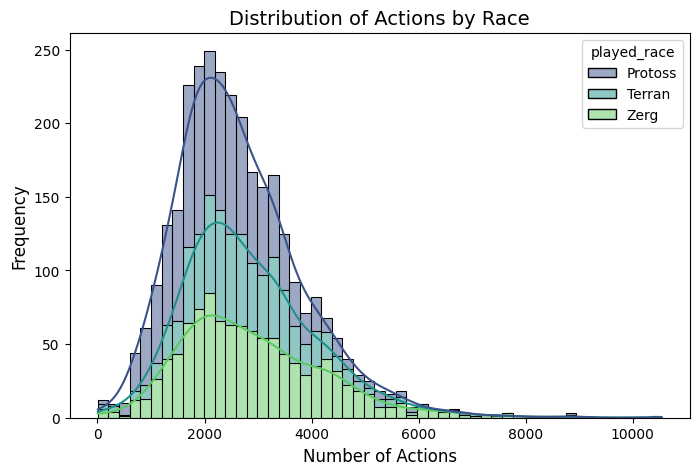

In [38]:
# Calculate number of actions for each row (excluding played_race)
processed_df['num_actions'] = processed_df.drop(columns=['battleneturl','played_race']).notna().sum(axis=1)

# Plot histogram of actions per race
plt.figure(figsize=(8, 5))
sns.histplot(data=processed_df, x='num_actions',hue='played_race', kde=True, palette="viridis", multiple="stack")
plt.title("Distribution of Actions by Race", fontsize=14)
plt.xlabel("Number of Actions", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [39]:
# Group by 'player' and count total actions
player_action_counts = processed_df.groupby('battleneturl')['num_actions'].mean()



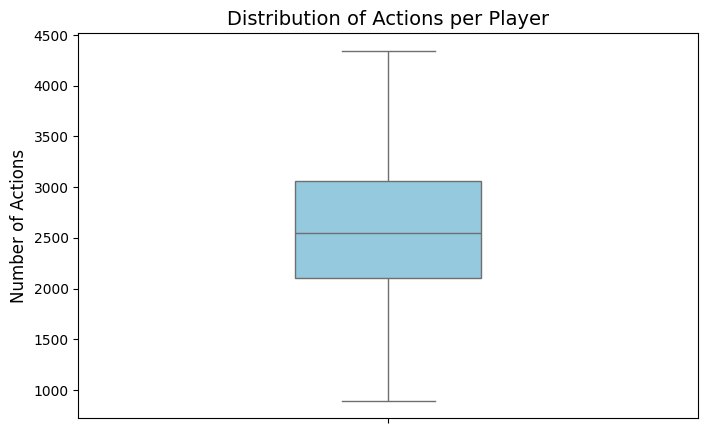

In [40]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=player_action_counts.values, orient="v", color="skyblue", width=0.3, flierprops={"marker": "o", "color": "red", "markersize": 6})
plt.title("Distribution of Actions per Player", fontsize=14)
plt.ylabel("Number of Actions", fontsize=12)
plt.show()


###  Analyzing the variable played_race

In [41]:
# Count occurrences of each race
race_distribution = processed_df['played_race'].value_counts()

# Print distribution
print(race_distribution)

played_race
Protoss    1208
Zerg       1058
Terran      778
Name: count, dtype: int64


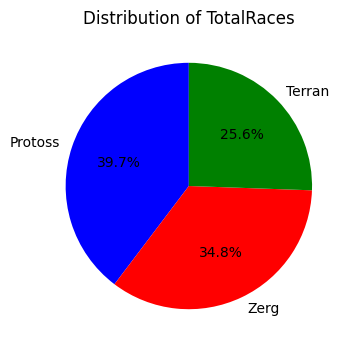

In [42]:
# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    race_distribution.values, 
    labels=race_distribution.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['blue', 'red', 'green']
)

# Add a title
plt.title('Distribution of TotalRaces')
plt.show()

In [45]:
# Count unique races played by each player (if player ID is available)
player_race_variety = features_train.groupby('battleneturl')['played_race'].nunique()

# Count how many players play 1, 2, or 3 races
race_variety_distribution = player_race_variety.value_counts()

# Print results
print(race_variety_distribution)


played_race
1    200
Name: count, dtype: int64


According to this result, each player only plays one kind of race. This seems odd: the following tests aim to verify if the above result is  correct.

In [46]:
# Check if each battleneturl is unique
duplicate_check = processed_df['battleneturl'].duplicated().any()
print(f"Are there duplicate battleneturl values? {duplicate_check}")


Are there duplicate battleneturl values? True


In [53]:
processed_df['battleneturl'].nunique()

200

Battleneturl seems to be correct.

In [54]:
# Preview a few players and their played_race
player_race_preview = processed_df[['battleneturl', 'played_race']].sort_values('battleneturl').head(30)
print(player_race_preview)


      battleneturl played_race
1633             0      Terran
1503             0      Terran
93               0      Terran
1496             0      Terran
91               0      Terran
1492             0      Terran
1635             0      Terran
1637             0      Terran
1640             0      Terran
1648             0      Terran
1652             0      Terran
89               0      Terran
87               0      Terran
85               0      Terran
1494             0      Terran
1734             0      Terran
1735             0      Terran
1736             0      Terran
1650             0      Terran
1505             0      Terran
1460             1      Terran
1462             1      Terran
1482             1      Terran
1475             1      Terran
1480             1      Terran
1781             1      Terran
1478             1      Terran
1782             1      Terran
1783             1      Terran
105              2      Terran


For player 0, only one race was played.

In [52]:
mock_data = pd.DataFrame({
    'battleneturl': ['player1', 'player1', 'player2', 'player3', 'player3', 'player3'],
    'played_race': ['Protoss', 'Protoss', 'Zerg', 'Protoss', 'Zerg', 'terran']
})

# Check unique races per player
mock_race_variety = mock_data.groupby('battleneturl')['played_race'].nunique()
mock_race_variety_distribution = mock_race_variety.value_counts()
print(mock_race_variety_distribution)

played_race
1    2
3    1
Name: count, dtype: int64


The logic of the code is correct. Therefore, we can conclude that each player only plays one kind of race.

###  Analyzing the incidence of sBase, sMineral and s 

In [55]:
processed_df.head(5)

,battleneturl,played_race,0,1,2,3,4,5,6,7,...,10528,10529,10530,10531,10532,10533,10534,10535,10536,num_actions
0,53,Protoss,Base,s,s,s,s,s,t5,Base,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2564
1,29,Protoss,s,Base,s,s,Base,s,s,Base,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2409
2,53,Protoss,Base,s,s,s,Base,s,hotkey30,hotkey00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1551
3,29,Protoss,Base,s,s,Base,s,s,s,t5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1590
4,53,Protoss,Base,s,s,s,Base,s,hotkey30,hotkey00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,728


In [60]:
features_train[30].unique()

array(['s', 'hotkey32', 't25', 'hotkey42', 'hotkey02', 'hotkey22',
       'hotkey62', 't20', 't35', 'hotkey12', 'hotkey20', 't10', nan,
       't15', 'hotkey52', 'hotkey10', 't30', 'SingleMineral', 'hotkey40',
       't40', 'hotkey92', 'hotkey30', 'Base', 'hotkey82', 'hotkey70',
       'hotkey60', 't55', 't45', 't50', 'hotkey90', 'hotkey01',
       'hotkey50', 'hotkey72', 'hotkey80', 'hotkey00'], dtype=object)

In [61]:
def calculate_action_ratios(row):
    # Define the columns of actions (columns 0 to 10536, excluding the last column 'num_actions')
    action_columns = [str(i) for i in range(0, 10537)]
    
    # Extract action values from the row
    actions = row[action_columns].values
    
    # Count occurrences of 's', 'Base', and 'SingleMineral'
    s_count = sum(1 for action in actions if action == 's')
    base_count = sum(1 for action in actions if action == 'Base')
    mineral_count = sum(1 for action in actions if action == 'SingleMineral')
    
    # Extract the total number of actions from the 'num_actions' column
    total_actions = row['num_actions']
    
    # Calculate the ratios
    ratio_s = s_count / total_actions if total_actions > 0 else 0
    ratio_base = base_count / total_actions if total_actions > 0 else 0
    ratio_mineral = mineral_count / total_actions if total_actions > 0 else 0
    
    # Return the ratios as a dictionary
    return pd.Series({'ratio_s': ratio_s, 'ratio_base': ratio_base, 'ratio_mineral': ratio_mineral})

In [62]:
# Apply the function to each row of the dataframe
processed_df[['ratio_s', 'ratio_base', 'ratio_mineral']] = processed_df.apply(calculate_action_ratios, axis=1)

/var/folders/4x/y__mblt174s0vyftkcq8mwgw0000gn/T/ipykernel_52700/3215833667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[['ratio_s', 'ratio_base', 'ratio_mineral']] = processed_df.apply(calculate_action_ratios, axis=1)
/var/folders/4x/y__mblt174s0vyftkcq8mwgw0000gn/T/ipykernel_52700/3215833667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[['ratio_s', 'ratio_base', 'ratio_mineral']] = processed_df.apply(calculate_action_ratios, axis=1)
/var/folders/4x/y__mblt174s0vyftkc

look at the distribution  of these variables; median  grouped by player

In [22]:
class CancelBatchException(Exception):
    """Used to cancel processing of a batch of data (when the keystroke sequence is fully read)"""